In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_covtype
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, r2_score, mean_squared_error
import pandas as pd

In [2]:
# Get data
data = fetch_covtype()
X = data.data
y = data.target
y = y - 1

In [3]:
# Standardize
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)
input_dimension = X_train.shape[1]
targets = 7

In [4]:
# Model
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(input_dimension,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(targets, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               7040      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                                 
Total params: 40583 (158.53 KB)
Trainable params: 40583 

In [5]:
# Train
training_history = model.fit(X_train, y_train, epochs=11, batch_size=32, validation_split=0.2)

Epoch 1/11
11621/11621 [==============================] - 46s 4ms/step - loss: 0.5096 - accuracy: 0.7834 - val_loss: 0.4147 - val_accuracy: 0.8268
Epoch 2/11
11621/11621 [==============================] - 46s 4ms/step - loss: 0.3794 - accuracy: 0.8416 - val_loss: 0.3428 - val_accuracy: 0.8575
Epoch 3/11
11621/11621 [==============================] - 47s 4ms/step - loss: 0.3274 - accuracy: 0.8656 - val_loss: 0.3103 - val_accuracy: 0.8753
Epoch 4/11
11621/11621 [==============================] - 46s 4ms/step - loss: 0.2960 - accuracy: 0.8787 - val_loss: 0.2871 - val_accuracy: 0.8837
Epoch 5/11
11621/11621 [==============================] - 44s 4ms/step - loss: 0.2744 - accuracy: 0.8880 - val_loss: 0.2696 - val_accuracy: 0.8894
Epoch 6/11
11621/11621 [==============================] - 44s 4ms/step - loss: 0.2578 - accuracy: 0.8953 - val_loss: 0.2514 - val_accuracy: 0.8996
Epoch 7/11
11621/11621 [==============================] - 42s 4ms/step - loss: 0.2449 - accuracy: 0.9009 - val_loss: 0

3632/3632 [==============================] - 8s 2ms/step - loss: 0.2196 - accuracy: 0.9120
Test Accuracy: 0.912
3632/3632 [==============================] - 7s 2ms/step


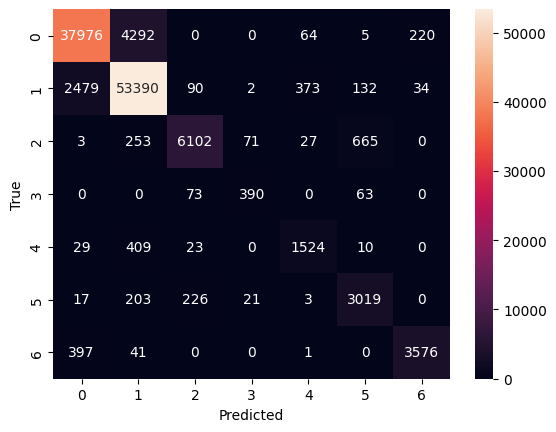

In [6]:
# Evaluate - Confusion Matrix and Accuracy
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.3f}")
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [8]:
# Evaluate - ROC/AUC Curves
falsePos = dict()
truePos = dict()
roc_auc = dict()
for i in range(targets):
    falsePos[i], truePos[i], _ = roc_curve(y_test == i, y_pred[:, i])
    roc_auc[i] = auc(falsePos[i], truePos[i])

# Print ROC/AUC value for each respective class
for i in range(targets):
    print(f"Class {i+1} - AUC: {roc_auc[i]:.3f}")

Class 1 - AUC: 0.984
Class 2 - AUC: 0.982
Class 3 - AUC: 0.998
Class 4 - AUC: 0.999
Class 5 - AUC: 0.995
Class 6 - AUC: 0.996
Class 7 - AUC: 0.999


In [9]:
# Create a Dummy Classifier
baseline_acc = max(np.bincount(y_test)) / len(y_test)

# Print the baseline accuracy
print(f"Baseline Accuracy: {baseline_acc:.3f}")

Baseline Accuracy: 0.486
